In [11]:
import os
import zipfile
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt

In [12]:
with zipfile.ZipFile('data.zip') as zip_ref:
  zip_ref.extractall()

In [13]:
data = []
base_dir = 'data'
status = {'idle': 0, 'running': 1, 'stairs': 2, 'walking': 3}

for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        
        row = {}
        for column in df.columns:
            axis = column[-1]
            row[axis + '_mean'] = df[column].mean()
            row[axis + '_variance'] = df[column].var()
            row[axis + '_std'] = df[column].std()
            row[axis + '_median'] = df[column].median()
            row[axis + '_max'] = df[column].max()
            row[axis + '_min'] = df[column].min()
            row[axis + '_rms'] = np.sqrt((df[column] ** 2).mean())
        
        row['status'] = status[folder]
        data.append(row)

data = pd.DataFrame(data)
data

,X_mean,X_variance,X_std,X_median,X_max,X_min,X_rms,Y_mean,Y_variance,Y_std,...,Y_min,Y_rms,Z_mean,Z_variance,Z_std,Z_median,Z_max,Z_min,Z_rms,status
0,7.409416,76.998064,8.774854,5.307945,27.087997,-5.295974,11.372375,9.976958,146.789308,12.115664,...,-9.452309,15.538212,-0.256978,29.532704,5.434400,-1.218649,12.014104,-9.667787,5.349235,1
1,5.468038,53.767946,7.332663,3.612850,23.879768,-7.656657,9.048487,6.951644,95.894508,9.792574,...,-11.109096,11.875327,1.152409,50.960619,7.138671,0.842759,14.987702,-13.977349,7.112663,1
2,7.893204,115.525614,10.748284,4.920084,38.197090,-5.224148,13.190050,8.591353,128.447666,11.333475,...,-11.563994,14.070445,-0.739170,90.935806,9.536027,-2.693477,31.115046,-22.026655,9.404838,1
3,6.006893,96.930381,9.845323,3.284845,27.092787,-8.729259,11.392196,8.418812,329.678713,18.157057,...,-24.899698,19.737422,-0.534067,26.470942,5.144992,-1.651999,14.920665,-10.433931,5.086630,1
4,8.396306,119.531329,10.933038,5.887342,38.197090,-7.522581,13.639828,9.223423,172.722327,13.142387,...,-12.186486,15.875656,2.074177,80.609107,8.978257,-1.058237,31.115046,-12.837709,9.067764,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,-0.268150,11.537731,3.396724,-0.179565,5.272033,-7.426813,3.350380,-11.872208,35.448681,5.953880,...,-25.546135,13.236932,-2.679910,38.573650,6.210769,-2.545036,9.021352,-22.663513,6.668566,2
6458,-0.410206,14.804948,3.847720,-0.074220,5.272033,-9.528923,3.805223,-12.038365,39.446280,6.280627,...,-25.546135,13.529732,-2.939122,40.125068,6.334435,-2.308010,7.800309,-22.663513,6.886654,2
6459,1.025197,7.708138,2.776353,0.919373,5.880160,-4.769250,2.915858,-8.778580,10.909678,3.302980,...,-16.826450,9.359994,-2.715025,28.876039,5.373643,-2.329558,9.021352,-22.663513,5.940106,2
6460,-3.485958,9.810097,3.132107,-2.961628,2.987964,-10.036493,4.651343,-9.529082,20.769973,4.557409,...,-18.492813,10.530007,-1.474190,6.371714,2.524225,-1.319205,2.652776,-7.479486,2.886617,2


Створення моделі

Розділення даних для навчання та тестування

In [14]:
X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Розмір навчального набору:", X_train.shape)
print("Розмір тестувального набору:", X_test.shape)

Розмір навчального набору: (5169, 21)
Розмір тестувального набору: (1293, 21)


Побудова SVM моделі

In [15]:
svm_model = SVC()

svm_model.fit(X_train, y_train)

SVC()

Побудова моделі випадкового лісу

In [16]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

RandomForestClassifier()

Оцінка моделі SVM за допомогою classification report

In [17]:
svm_predictions = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
svm_class_report = classification_report(y_test, svm_predictions, zero_division=1)

print("\nОцінка моделі SVM:")
print("Accuracy:", svm_accuracy)
print("\nConfusion Matrix:\n", svm_confusion_matrix)
print("\nClassification Report:\n", svm_class_report)


Оцінка моделі SVM:
Accuracy: 0.9822119102861562

Confusion Matrix:
 [[208   0   0   0]
 [  0 701   0   0]
 [  0   0   0  23]
 [  0   0   0 361]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       701
           2       1.00      0.00      0.00        23
           3       0.94      1.00      0.97       361

    accuracy                           0.98      1293
   macro avg       0.99      0.75      0.74      1293
weighted avg       0.98      0.98      0.97      1293



Оцінка моделі випадкового лісу за допомогою classification report

In [18]:
rf_predictions = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

print("\nОцінка моделі випадкового лісу:")
print("Accuracy:", rf_accuracy)
print("\nConfusion Matrix:\n", rf_confusion_matrix)
print("\nClassification Report:\n", rf_class_report)


Оцінка моделі випадкового лісу:
Accuracy: 1.0

Confusion Matrix:
 [[208   0   0   0]
 [  0 701   0   0]
 [  0   0  23   0]
 [  0   0   0 361]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       701
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00       361

    accuracy                           1.00      1293
   macro avg       1.00      1.00      1.00      1293
weighted avg       1.00      1.00      1.00      1293



Порівняння моделей

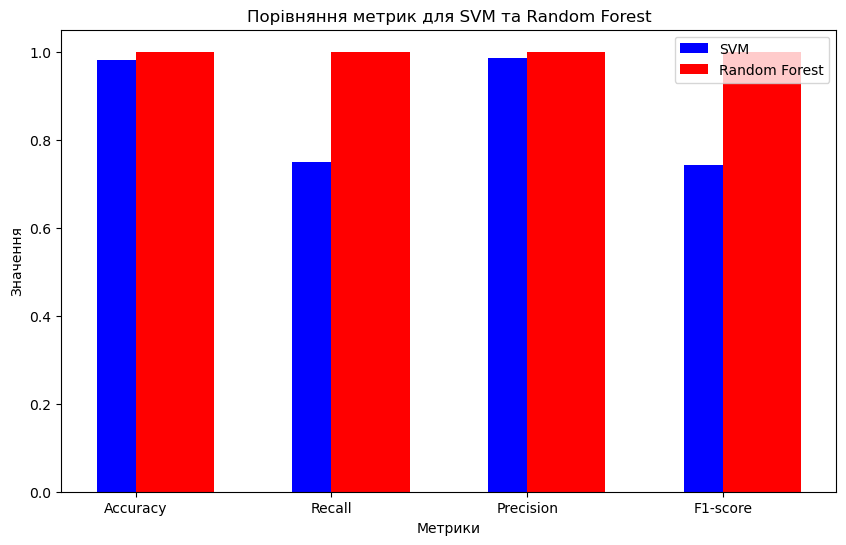

In [19]:
svm_metrics = [
    svm_accuracy,
    recall_score(y_test, svm_predictions, average='macro', zero_division=1),
    precision_score(y_test, svm_predictions, average='macro', zero_division=1),
    f1_score(y_test, svm_predictions, average='macro', zero_division=1)
]

rf_metrics = [
    rf_accuracy,
    recall_score(y_test, rf_predictions, average='macro', zero_division=1),
    precision_score(y_test, rf_predictions, average='macro', zero_division=1),
    f1_score(y_test, rf_predictions, average='macro', zero_division=1)
]


metrics_names = ['Accuracy', 'Recall', 'Precision', 'F1-score']
x = range(len(metrics_names))

plt.figure(figsize=(10, 6))
plt.bar(x, svm_metrics, width=0.4, label='SVM', color='b', align='center')
plt.bar(x, rf_metrics, width=0.4, label='Random Forest', color='r', align='edge')
plt.xlabel('Метрики')
plt.ylabel('Значення')
plt.title('Порівняння метрик для SVM та Random Forest')
plt.xticks(x, metrics_names)
plt.legend()
plt.show()


### Аналіз результатів:

1. **Точність (Accuracy):**
 - Модель SVM показала точність 98.22%, що є дуже високим показником.
 - Модель випадкового лісу досягла ідеальної точності 100%.

2. **Точність за класами (Precision):**
 - Модель SVM показала високу точність для класів "idle", "running", та "walking" (по 1.00), але мала проблеми з класом "stairs", де precision дорівнює 0.00.
 - Модель випадкового лісу показала ідеальну точність для всіх класів (1.00).

3. **Повнота (Recall):**
 - Модель SVM має ідеальну повноту для класів "idle", "running", та "walking" (по 1.00), але дуже низьку для класу "stairs" (0.00).
 - Модель випадкового лісу має ідеальну повноту для всіх класів (1.00).

4. **Оцінка F1:**
 - Модель SVM має високі оцінки F1 для класів "idle", "running", та "walking" (по 1.00 для перших двох і 0.97 для останнього), але 0.00 для класу "stairs".
 - Модель випадкового лісу має ідеальні оцінки F1 для всіх класів (1.00).

### Підсумок:

Обидві моделі демонструють високу точність, але модель випадкового лісу (Random Forest) перевершує модель SVM у всіх ключових метриках. Модель SVM має суттєві проблеми з класифікацією класу "stairs", в той час як модель випадкового лісу забезпечує ідеальну класифікацію всіх класів. Таким чином, модель випадкового лісу є більш надійною і точнішою для завдання класифікації діяльності людини за даними акселерометра.
